In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [2]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 100

# 生成 同心圓 資料點
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

# 生成 斜向三群 資料點 (使用轉換矩陣)
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# 生成 稀疏三群 資料點
varied = datasets.make_blobs(n_samples=n_samples,cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

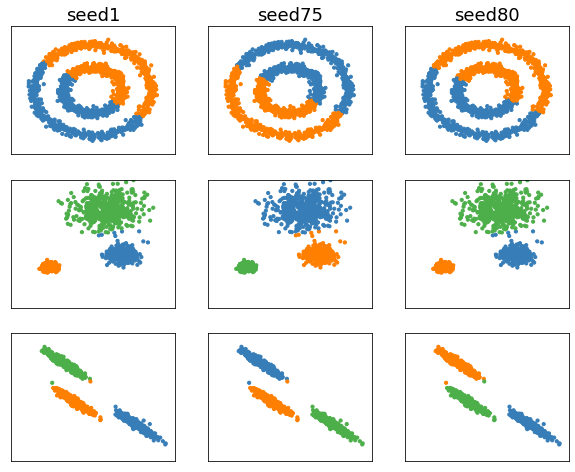

In [3]:
# 設定群集與繪圖參數
plt.figure(figsize=(10, 8))
plot_num = 1

datasets = [(noisy_circles, {'n_clusters': 2}), 
            (varied, {'n_clusters': 3}), 
            (aniso, {'n_clusters': 3})]

# 執行各種樣板資料的繪圖迴圈
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # 設定KMeans三種不同的起始點
    random_1 = cluster.KMeans(n_clusters=algo_params['n_clusters'], random_state=1)
    random_75 = cluster.KMeans(n_clusters=algo_params['n_clusters'], random_state=75)
    random_80 = cluster.KMeans(n_clusters=algo_params['n_clusters'], random_state=80)

    clustering_algorithms = (
        ('seed1', random_1),
        ('seed75', random_75),
        ('seed80', random_80))

    # 繪製三種圖形
    for name, algorithm in clustering_algorithms:
        y_pred = algorithm.fit_predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))

        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1
plt.show()

# 觀察結果
觀察結果
隨著randoms init 不同，分群結果會有所改變